In [1]:
import gpytorch

from bo_functions import best_error_advanced
from bo_functions import calc_ei_advanced
from bo_functions import LHS_Design
from bo_functions import create_y_data
from bo_functions import test_train_split
from bo_functions import ExactGPModel
from bo_functions import train_GP_model
from bo_functions import calc_GP_outputs
from bo_functions import calc_y_expected
from bo_functions import improvement_integral

from bo_plotters import plotter_adv
from bo_plotters import y_plotter_adv
from bo_plotters import stdev_plotter_adv
from bo_plotters import ei_plotter_adv

In [2]:
#Test calc_ei_adv (to compare with hand calcs)
import numpy as np
import torch
er_best = 2.0
mu = torch.tensor([3])
y_exp2 = np.array([4])
pred_var = torch.tensor([1])
print("EI:",calc_ei_advanced(er_best,mu,pred_var,y_exp2))

Upper bound is 2.414213562373095
Lower bound is -0.41421356237309515
pdf upper is 0.021641292583382807
cdf upper is 0.9921153917769587
pdf lower is 0.36614532160079927
cdf lower is 0.339358855094689
EI: [-0.11799097]


Integrand: [array([-5.05484635e-05]), array([-0.0045432]), array([-0.10334574]), array([-0.50843871]), array([-0.14351035]), array([0.61625031]), array([0.15474222]), array([-0.00977314]), array([-0.00131635]), array([-2.08140732e-05])]
Integrand Lower: [-1.62601187e-16]
Integrand Upper: [9.61066452e-18]


Text(0, 0.5, 'Improvement Integrand')

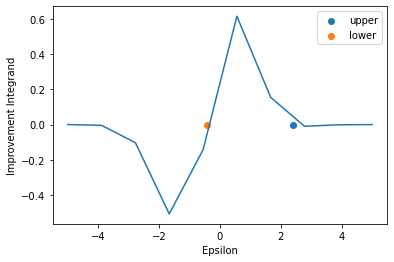

In [3]:
EPS = np.linspace(-5,5,10)
EPS_upper = ((y_exp2 - mu.numpy()) +np.sqrt(er_best))/np.sqrt(pred_var.numpy())
integrand_upper = improvement_integral(er_best,mu,pred_var,y_exp2,EPS_upper)
EPS_lower = ((y_exp2 - mu.numpy()) -np.sqrt(er_best))/np.sqrt(pred_var.numpy())
integrand_lower = improvement_integral(er_best,mu,pred_var,y_exp2,EPS_lower)

I_test = []
for i in range(len(EPS)):
    I_i = I = improvement_integral(er_best,mu,pred_var,y_exp2,EPS[i])
    I_test.append(I_i)
print("Integrand:", I_test) 
print("Integrand Lower:",integrand_lower )
print("Integrand Upper:",integrand_upper )

from matplotlib import pyplot as plt    
plt.plot(EPS,I_test)
plt.scatter(EPS_upper,integrand_upper, label="upper")
plt.scatter(EPS_lower,integrand_lower, label ="lower")
plt.legend()
plt.xlabel("Epsilon")
plt.ylabel("Improvement Integrand")